In [1]:
import numpy as np
import pandas as pd
# import folium
import math 
import os
import time
import copy
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("CaliforniaRoadNetwork_Edges.csv")
df2 = pd.read_csv("CaliforniaRoadNetwork_Nodes.csv")

In [3]:
df1

,EdgeID,StartNodeID,EndNodeID
0,0,0,1
1,1,0,6
2,2,1,2
3,3,2,3
4,4,3,4
...,...,...,...
21688,21688,21042,21043
21689,21689,21043,21044
21690,21690,21044,21045
21691,21691,21044,21047


In [4]:
df2
#这两个的差不能说是m或者km，只能看成是经纬度的距离差

,NodeID,Longitude,Latitude
0,0,-121.904167,41.974556
1,1,-121.902153,41.974766
2,2,-121.896790,41.988075
3,3,-121.889603,41.998032
4,4,-121.886681,42.008739
...,...,...,...
21043,21043,-117.042160,32.550213
21044,21044,-117.043533,32.546886
21045,21045,-117.055840,32.553497
21046,21046,-117.067970,32.562462


In [5]:
# import folium
# m = folium.Map(
#     location=[41.974556, -121.904167],
#     zoom_start=7.5
    
# )
# for i in range(len(df2)):
#         m.add_child(
#         folium.CircleMarker(
#               [df2["Latitude"][i],df2["Longitude"][i]],
#              radius=2, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='red',
#              fill_opacity=1.5
#      )
#     )
# m.add_child(folium.LatLngPopup())
# display(m)
# m.save('Position Visualization.html')

In [5]:
lon_var_lad =  df2.iloc[:,1:]
EuclideanDistance_func = lambda a,b: math.sqrt((a[0]-a[1])**2 + (b[0]-b[1])**2)

def apply_heuristics_function(row):
    node1_Lon,node1_Lat = lon_var_lad.values[int(row['StartNodeID'])]
    node2_Lon,node2_Lat = lon_var_lad.values[int(row['EndNodeID'])]
    return EuclideanDistance_func((node1_Lon,node2_Lon),(node1_Lat,node2_Lat))
df1["EuclideanDistance"] = df1.apply(lambda x: round(10000*apply_heuristics_function(x),2), axis =1)

graph_search = {k:[] for k in range(len(lon_var_lad))}
for row in df1.iloc[:,1:].values:
    StartNodeID , EndNodeID, EuclideanDistance = row
    StartNodeID , EndNodeID = map(int, (StartNodeID , EndNodeID))
    graph_search[StartNodeID].append((EndNodeID,EuclideanDistance))
    graph_search[EndNodeID].append((StartNodeID,EuclideanDistance))

In [6]:
graph_search

{0: [(1, 20.25), (6, 59.53)],
 1: [(0, 20.25), (2, 143.49)],
 2: [(1, 143.49), (3, 122.8)],
 3: [(2, 122.8), (4, 110.99)],
 4: [(3, 110.99)],
 5: [(6, 61.57), (7, 14.09), (8, 120.09)],
 6: [(0, 59.53), (5, 61.57)],
 7: [(5, 14.09), (265, 32.12)],
 8: [(5, 120.09), (298, 53.82)],
 9: [(10, 129.4), (36, 186.94), (37, 29.48)],
 10: [(9, 129.4), (11, 132.38)],
 11: [(10, 132.38), (12, 280.27)],
 12: [(11, 280.27), (13, 163.23)],
 13: [(12, 163.23), (14, 321.9)],
 14: [(13, 321.9), (15, 91.04)],
 15: [(14, 91.04), (16, 127.08)],
 16: [(15, 127.08), (17, 266.48)],
 17: [(16, 266.48), (18, 96.36)],
 18: [(17, 96.36), (19, 142.09)],
 19: [(18, 142.09), (20, 82.61)],
 20: [(19, 82.61), (21, 115.07)],
 21: [(20, 115.07), (22, 85.85)],
 22: [(21, 85.85), (23, 119.7)],
 23: [(22, 119.7), (24, 117.13)],
 24: [(23, 117.13), (25, 116.7)],
 25: [(24, 116.7), (26, 71.86)],
 26: [(25, 71.86), (27, 105.22)],
 27: [(26, 105.22), (28, 42.8)],
 28: [(27, 42.8), (29, 257.94)],
 29: [(28, 257.94), (30, 121.05

# Q1
![avator](./200_Question/question1.png)

In [17]:
print(bfs(graph_search, 0, 1894))
print(bfs(graph_search, 4, 3115))
print(bfs(graph_search, 18, 9186))
print(bfs(graph_search, 25, 15061))
print(bfs(graph_search, 33, 21040))

(25980.700000000004, 2236)
(34583.880000000005, 3136)
(66505.36000000002, 8771)
(96177.64999999995, 14180)
(140101.80000000002, 20625)


In [21]:
print(dfs(graph_search, 0, 1894))
print(dfs(graph_search, 4, 3115))
print(dfs(graph_search, 18, 9186))
print(dfs(graph_search, 25, 15061))
print(dfs(graph_search, 33, 21040))

(473343.7500000003, 5081)
(1154617.3800000013, 18542)
(942171.5800000048, 15594)
(192300.4800000002, 1400)
(160931.38000000006, 7587)


In [15]:
print(uniform_cost_search(graph_search, 0, 1894))
print(uniform_cost_search(graph_search, 4, 3115))
print(uniform_cost_search(graph_search, 18, 9186))
print(uniform_cost_search(graph_search, 25, 15061))
print(uniform_cost_search(graph_search, 33, 21040))

(25980.700000000004, 1861)
(32112.110000000008, 2837)
(64914.03999999999, 9637)
(90278.08999999998, 13479)
(122711.44000000006, 19197)


In [18]:
print(greedy_search(graph_search, 0, 1894, sld_to_des(1894)))
print(greedy_search(graph_search, 4, 3115, sld_to_des(3115)))
print(greedy_search(graph_search, 18, 9186, sld_to_des(9186)))
print(greedy_search(graph_search, 25, 15061, sld_to_des(15061)))
print(greedy_search(graph_search, 33, 21040, sld_to_des(21040)))

(35097.51000000002, 329)
(34583.880000000005, 193)
(93169.89000000001, 667)
(108937.91999999993, 596)
(190658.42, 1548)


In [20]:
print(a_star_search(graph_search, 0, 1894, sld_to_des(1894)))
print(a_star_search(graph_search, 4, 3115, sld_to_des(3115)))
print(a_star_search(graph_search, 18, 9186, sld_to_des(9186)))
print(a_star_search(graph_search, 25, 15061, sld_to_des(15061)))
print(a_star_search(graph_search, 33, 21040, sld_to_des(21040)))

(25980.700000000004, 1861)
(32112.110000000008, 2836)
(64914.03999999999, 9637)
(90278.08999999998, 13479)
(122711.44000000006, 19196)


# Q2
![avator](./200_Question/question2.png)

In [10]:
# 生成100对随机的点，并且将其保存下来。用共同的数据来测试这五个算法

### 2.1 BFS

In [7]:
def bfs(graph_to_search, initial_state, goal_state):
    
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        path = frontiers.pop(0)  # Get the first element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return  goal_cost,len(visited) # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

### 2.2 DFS

In [8]:
def dfs(graph_to_search, initial_state, goal_state):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return  goal_cost, len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

In [13]:
# test_start_node = data['start_node']
# test_end_node = data['end_node']
# Occupancy_of_space = 0
# p = [] #path
# c = [] #cost
# space = []
# for i in range(100):
#     p.append(i)
#     c.append(i)
#     space.append(i)
    

# time_start = time.perf_counter()
# for i in range(100):
#     (p[i],c[i],space[i]) = dfs(graph_search,test_start_node[i],test_end_node[i],verbose = False)
#     print('---',p[i],c[i],'\n\n\n')
    
# time_end = time.perf_counter()
# run_time = time_end - time_start
# print('Run_time:',run_time)

# for i in range(100):
#     Occupancy_of_space = Occupancy_of_space + space[i]
# print('Occupancy_of_space: ',Occupancy_of_space)

### 2.3 UniformSearch

In [9]:
def uniform_cost_search(graph_to_search, initial_state, goal_state):
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        frontiers = sorted(frontiers, key=lambda x: x[0])
        path = frontiers.pop(0)  # Get the first path in the queue
        node = path[-1]  # Get the last node in this path
        
        if node == goal_state:
            # goal_path = path[1:]
            goal_cost = path[0]
            return goal_cost,len(visited)
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

In [15]:
# def fuction(search):
#     return str(search.name)

# fuction(uniform_cost_search)

In [16]:

# Occupancy_of_space = 0
# p = [] #path
# c = [] #cost
# space = []
# for i in range(100):
#     p.append(i)
#     c.append(i)
#     space.append(i)
    

# time_start = time.perf_counter()
# for i in range(100):
#     (p[i],c[i],space[i]) = uniform_cost_search(graph_search,test_start_node[i],test_end_node[i],verbose = False)
#     print('---',p[i],c[i],'\n\n\n')
    
# time_end = time.perf_counter()
# run_time = time_end - time_start
# print('Run_time:',run_time)

# for i in range(100):
#     Occupancy_of_space = Occupancy_of_space + space[i]
# print('Occupancy_of_space: ', Occupancy_of_space)

In [17]:
# x = ['BFS','DFS','Uniform cost search']
# time = [244.1602,214.4529,261.5256]
# space = [1060368,1093080,1079120]
# fig, ax1 = plt.subplots(figsize=(10, 10),dpi=100)



# ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
# ax1.set_title("Performance Evaluation", fontsize=15)

# ax2 = ax1.twinx() 
# ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
# ax1.legend(loc=1)
# ax2.legend(loc=2)



# for i,(_x,_y) in enumerate(zip(x,time)):  
#     ax1.text(_x,_y+2,time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

# for i,(_x,_y) in enumerate(zip(x,space)):  
#     ax2.text(_x,_y+3,space[i],color='black',fontsize=10)  #将数值显示在图形上

# # for x,y in zip(x,time):
# #     #ha horizontal alignment
# #     plt.text(x,y+0.05,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # for x,y in zip(x,space):
# #     #ha horizontal alignment
# #     plt.text(x,y,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')
# plt.grid()
# plt.savefig("coompare.jpg")
# plt.show()

In [18]:
# x = ['BFS','DFS','uniform_cost_search']

# fig, ax = plt.subplots(figsize=(7, 4))
# ax.bar(x=x, height = space)
# ax.set_title("Occupancy_of_space", fontsize=15)

In [19]:
'''
bfs,dfs,uniform search    -> len(visited)
tree like search -> len(frontiers)
greedy search -> len(visited)
A* Search -> len(visited)
depth limited dfs  -> len(visited)
Iterative limited -> len(frontiers)
''' 

'\nbfs,dfs,uniform search    -> len(visited)\ntree like search -> len(frontiers)\ngreedy search -> len(visited)\nA* Search -> len(visited)\ndepth limited dfs  -> len(visited)\nIterative limited -> len(frontiers)\n'

In [10]:
# heuristics function
def heuristics_function(start_node,end_node):
    node1_lon, node1_lat = lon_var_lad.values[start_node]
    node2_lon, node2_lat = lon_var_lad.values[end_node]
    return EuclideanDistance_func((node1_lon,node2_lon),(node1_lat,node2_lat))
    
def sld_to_des(des_node)->dict:
    graph_search_sld = {}
    nodes = list(range(len(lon_var_lad)))
    for node in nodes:
        graph_search_sld[node] = heuristics_function(node,des_node)
    return graph_search_sld

### 2.4 GreedySearch

In [11]:
def greedy_search(graph_to_search, initial_state, goal_state,heuristic_fuc):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    times =0
    while len(frontiers) > 0:   # use while loop to iteratively perform search
        times+=1
        frontier_heuristics = []
        for x in frontiers:
            frontier_heuristics.append(heuristic_fuc[x[-1]])
        idx_to_pop = frontier_heuristics.index(min(frontier_heuristics))
        
        path = frontiers.pop(idx_to_pop)
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost,len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

### 2.5 A* Search

In [12]:
def a_star_search(graph_to_search, initial_state, goal_state,heuristic_fuc):
    
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
    
        # get the nodes in frontiers to be expanded
        estimated_path_cost = []
        for x in frontiers:
            heuristic_value = heuristic_fuc[x[-1]]
            path_cost = x[0]
            estimated_path_cost.append(heuristic_value+path_cost)
        idx_to_pop = estimated_path_cost.index(min(estimated_path_cost))
        
        path = frontiers.pop(idx_to_pop)
        node = path[-1]  # Get the last node in this path
        
        if node == goal_state:
            # goal_path = path[1:]
            goal_cost = path[0]
            return  goal_cost,len(visited)
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.

            frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)


    return None

# Q3
![avator](./200_Question/question3.png)

In [26]:
if 1==0: #sample 100 nodes
    start_node = []
    end_node = []

    for i in range(100):
        start_node.append(np.random.randint(0,len(df2))) 
        end_node.append( np.random.randint(0,len(df2)))
        
    data = {'start_node':start_node, 'end_node':end_node}
    data = pd.DataFrame(data)
    data.to_csv('test_data.csv',index = False)

In [27]:
test_data = pd.read_csv("test_data.csv")
test_start_node = test_data['start_node']
test_end_node = test_data['end_node']


In [28]:
def Validation(search,start_node,end_node,limited):
    test_times =len(start_node)
    space = [0]*test_times
    cost = [0]*test_times

    time_start = time.perf_counter()

    if limited == 0: # if fuction dose not has limited depth
        for i in range(test_times):
            cost[i], space[i] = search(graph_search,start_node[i],end_node[i])

    elif limited > 0: # if fuction has limited depth
        drop_time = 0
        for i in range(test_times):
            result = search(graph_search,start_node[i],end_node[i],limited)
            if result != None:
                cost[i-drop_time], space[i-drop_time] = result
            else:
                cost.pop(i-drop_time)
                space.pop(i-drop_time)
                drop_time+=1
                print(f"Cannot find goal for {drop_time} times in squence{i}")
    else: # search need a huristic fuction 
        for i in range(test_times):
            cost[i], space[i] = search(graph_search,start_node[i],end_node[i],sld_to_des(end_node[i]))

    time_end = time.perf_counter()
    run_time = time_end - time_start
    print('Total Run_time:',run_time)

    print('Occupancy_of_space: ', np.mean(space))
    print()
    
    return np.mean(space) , run_time/test_times , np.mean(cost)


In [23]:
memory_dict=dict()
time_dict=dict()
cost_dict=dict()

In [24]:
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['BFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)

Total Run_time: 271.3577263
Occupancy_of_space:  9480.21

Total Run_time: 241.35232529999996
Occupancy_of_space:  9081.88

Total Run_time: 260.069486
Occupancy_of_space:  9368.67



In [25]:
memory_dict

{'BFS': 9480.21, 'DFS': 9081.88, 'Uniform_cost_search': 9368.67}

In [26]:
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)


Total Run_time: 18.17906770000002
Occupancy_of_space:  475.97

Total Run_time: 292.17304449999995
Occupancy_of_space:  9368.14



In [44]:
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)

KeyboardInterrupt: 

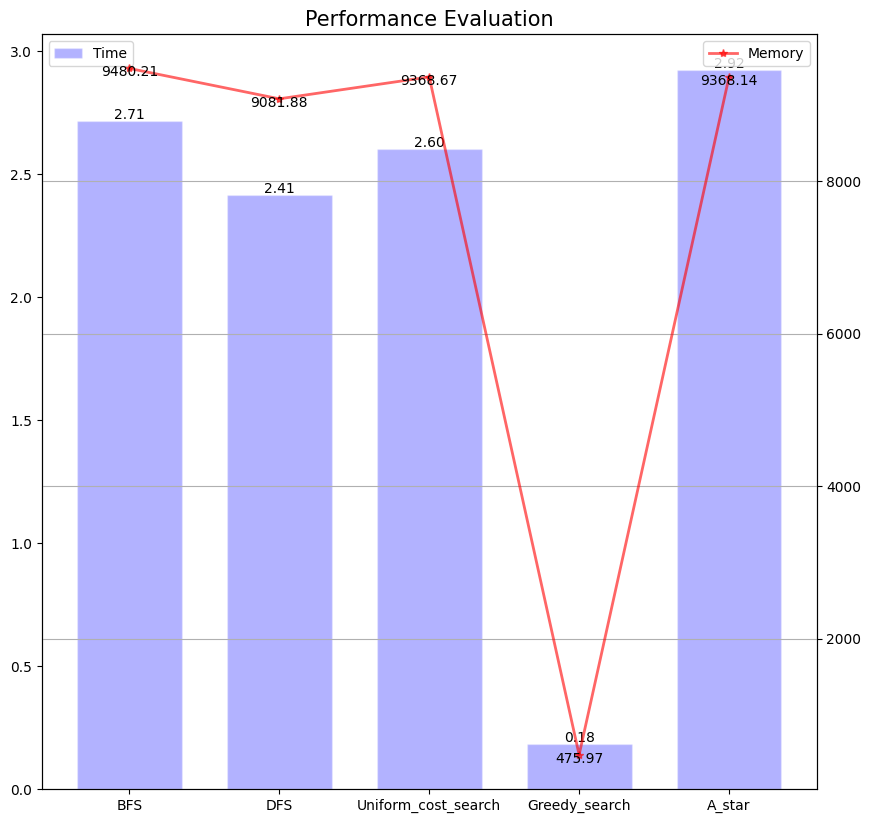

In [27]:
def Comparison(memory_dict,time_dict,jpgname):
    x = list(memory_dict.keys())
    time = list(time_dict.values())
    space = list(memory_dict.values())

    _, ax1 = plt.subplots(figsize=(10, 10),dpi=100)

    ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
    ax1.set_title("Performance Evaluation", fontsize=15)

    ax2 = ax1.twinx() 
    ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
    ax1.legend(loc=2)
    ax2.legend(loc=1)

    for i,(_x,_y) in enumerate(zip(x,time)):  
        ax1.text(_x,_y+0.01,r'%.2f'%time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for i,(_x,_y) in enumerate(zip(x,space)):  
        ax2.text(_x,_y-100,r'%.2f'%space[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上
    plt.grid()
    plt.savefig(jpgname)
    plt.show()
Comparison(memory_dict,time_dict,'Q2')


# Q4
![avator](./200_Question/question4.png)

### Depth Tree

In [29]:
### Depth TREE
def tree_like_search(graph_to_search, initial_state, goal_state):
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    ver = 0 # to
    while len(frontiers) > 0:   # use while loop to iteratively perform search

        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        
        if len(actions) == 0:#If next actions is empty, then pass this node,discard visited nodes
            visited = copy.deepcopy(frontiers[-1])# Cover the old visited with the frontiers
            del visited[0]# delate the cost information
            del visited[-1]# delate the unvisited node
            continue
            
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost,len(goal_path)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)
        ver += 1
    return None

In [30]:
# for i in range(100):
#     start_node = np.random.randint(0,len(df2))
#     end_node = np.random.randint(0,len(df2))
#     print('---',dfs_tree(graph_search,start_node,end_node,verbose = False),'\n\n\n')


### Depth limited 

In [31]:
def Depth_Limited_Search(graph_to_search, initial_state, goal_state, limited_deepth):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    
    while len(frontiers) > 0:   # use while loop to iteratively perform search
        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path

        if len(path)-1 == limited_deepth: 
            continue

        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost , len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)
    return None

In [32]:
# Depth_Limited_Search(graph_search,0,1894,200,verbose = False)

### Iterative_Deepening_dfs

In [33]:
def iterative_Deepening_dfs(graph_to_search, initial_state, goal_state):
    limit = 0
    while True:
        frontiers = [[0, initial_state]]
        visited = []

        while len(frontiers) > 0:

            path = frontiers.pop(-1)
            node = path[-1]

            if len(path)-1 == limit:
                continue

            if node in visited:
                continue

            actions = graph_to_search[node]
            for next_node, next_cost in actions:
                new_path = path.copy()
                new_path.append(next_node)
                new_path[0] = new_path[0] + next_cost

                if next_node in visited or new_path in frontiers:
                    continue

                if next_node == goal_state:
                    goal_path = new_path[1:]
                    goal_cost = new_path[0]
                    return goal_cost,len(goal_path)
                else:
                    frontiers.append(new_path)

            visited.append(node)
        limit += 1

In [34]:
memory_dict['Tree_like_search'],time_dict['Tree_like_search'],cost_dict['Iterative_limited'] = Validation(tree_like_search,test_start_node,test_end_node,0)

Total Run_time: 265.7033208999999
Occupancy_of_space:  4816.38



In [35]:
memory_dict['Iterative_limited'],time_dict['Iterative_limited'],cost_dict['Iterative_limited'] = Validation(iterative_Deepening_dfs,test_start_node,test_end_node,0)

Total Run_time: 246.96581149999997
Occupancy_of_space:  4816.38



In [36]:
memory_dict['Depth_limited'],time_dict['Depth_limited'],cost_dict['Depth_limited'] = Validation(Depth_Limited_Search,test_start_node,test_end_node,15000)

Total Run_time: 244.9982579
Occupancy_of_space:  9081.88



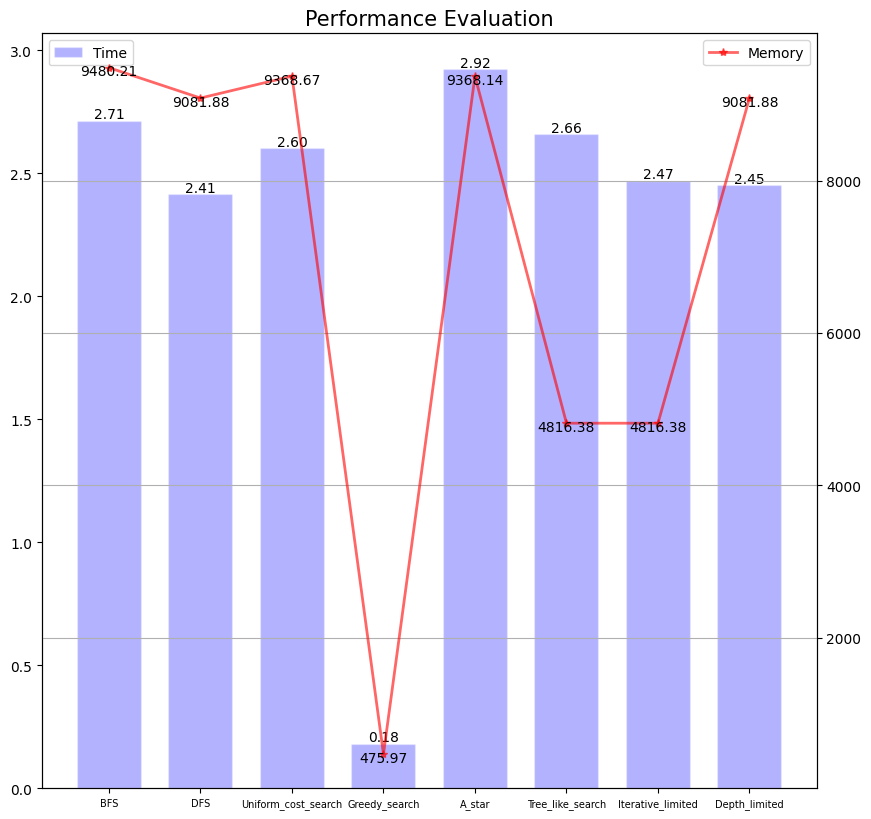

In [37]:
def Comparison2(memory_dict,time_dict,jpgname):
    x = list(memory_dict.keys())
    time = list(time_dict.values())
    space = list(memory_dict.values())

    _, ax1 = plt.subplots(figsize=(10, 10),dpi=100)

    ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
    ax1.set_title("Performance Evaluation", fontsize=15)

    ax2 = ax1.twinx() 
    ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
    ax1.legend(loc=2)
    ax2.legend(loc=1)

    for i,(_x,_y) in enumerate(zip(x,time)):  
        ax1.text(_x,_y+0.01,r'%.2f'%time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for i,(_x,_y) in enumerate(zip(x,space)):  
        ax2.text(_x,_y-100,r'%.2f'%space[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for label in ax1.get_xticklabels():
    #设置label的大小
        label.set_fontsize(7)

    plt.grid()
    plt.savefig(jpgname)
    plt.show()

Comparison2(memory_dict,time_dict,'Q4.jpg')


In [ ]:
# x = ['BFS','DFS','Uniform cost search']
# time = [244.1602,214.4529,261.5256]
# space = [1060368,1093080,1079120]
# fig, ax1 = plt.subplots(figsize=(10, 10),dpi=100)



# ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
# ax1.set_title("Performance Evaluation", fontsize=15)

# ax2 = ax1.twinx() 
# ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
# ax1.legend(loc=1)
# ax2.legend(loc=2)



# for i,(_x,_y) in enumerate(zip(x,time)):  
#     ax1.text(_x,_y+2,time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

# for i,(_x,_y) in enumerate(zip(x,space)):  
#     ax2.text(_x,_y+3,space[i],color='black',fontsize=10)  #将数值显示在图形上

# # for x,y in zip(x,time):
# #     #ha horizontal alignment
# #     plt.text(x,y+0.05,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # for x,y in zip(x,space):
# #     #ha horizontal alignment
# #     plt.text(x,y,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')
# plt.grid()
# plt.savefig("coompare.jpg")
# plt.show()

In [38]:
memory_dict

{'BFS': 9480.21,
 'DFS': 9081.88,
 'Uniform_cost_search': 9368.67,
 'Greedy_search': 475.97,
 'A_star': 9368.14,
 'Tree_like_search': 4816.38,
 'Iterative_limited': 4816.38,
 'Depth_limited': 9081.88}

In [39]:
cost_dict

{'BFS': 784442.9474281096,
 'Uniform_cost_search': 49551.521516869434,
 'Greedy_search': 62854.9827828663,
 'A_star': 49551.521516869434,
 'Iterative_limited': 784442.9474281096,
 'Depth_limited': 784442.9474281096}

In [40]:
time_dict

{'BFS': 2.7135772630000004,
 'DFS': 2.4135232529999997,
 'Uniform_cost_search': 2.60069486,
 'Greedy_search': 0.18179067700000018,
 'A_star': 2.9217304449999997,
 'Tree_like_search': 2.657033208999999,
 'Iterative_limited': 2.4696581149999997,
 'Depth_limited': 2.449982579}

In [34]:
# find the maxmun length

max_length = []
man_number = 0

for i in range(0,1000):
    for j in range(20000,21048):
        length = heuristics_function(i,j)
        max_length.append(length)

maxlen = max(max_length)
print('we find the max:',maxlen)

#length is 13, we can group into 6
#from 0-2, 2-4, 4-6, 6-8, 8-10, 10-?

import numpy as np
startpoint_1=[]
endpoint_1 = []
startpoint_2=[]
endpoint_2 = []
startpoint_3=[]
endpoint_3 = []
startpoint_4=[]
endpoint_4 = []
startpoint_5=[]
endpoint_5 = []
startpoint_6=[]
endpoint_6 = []

for i in range(40000):
    ii = np.random.randint(0,21048)
    jj = np.random.randint(0,21048)
    i_j_len = heuristics_function(ii,jj)
    if int(i_j_len) <= 2:
        if len(startpoint_1) == 100:
            pass
        else:
            startpoint_1.append(ii)
            endpoint_1.append(jj)
    if int(i_j_len) >2 and int(i_j_len) <=4:
        if len(startpoint_2) == 100:
            pass
        else:
            startpoint_2.append(ii)
            endpoint_2.append(jj)      
    if int(i_j_len) >4 and int(i_j_len) <=6:
        if len(startpoint_3) == 100:
            pass
        else:
            startpoint_3.append(ii)
            endpoint_3.append(jj)  
    if int(i_j_len) >6 and int(i_j_len) <=8:
        if len(startpoint_4) == 100:
            pass
        else:
            startpoint_4.append(ii)
            endpoint_4.append(jj)  
    if int(i_j_len) >8 and int(i_j_len) <=10 :
        if len(startpoint_5) == 100:
            pass
        else:
            startpoint_5.append(ii)
            endpoint_5.append(jj)  
    if int(i_j_len) >10 :
        if len(startpoint_6) == 100:
            pass
        else:
            startpoint_6.append(ii)
            endpoint_6.append(jj) 
            
    a = len(startpoint_1)
    b = len(startpoint_2)
    c = len(startpoint_3)
    d = len(startpoint_4)
    e = len(startpoint_5)
    f = len(startpoint_6)
    
    if i%500 == 0:
        print('In the i = ',i)
        print('The number in group 0-2 is:',a)
        print('The number in group 2-4 is:',b)
        print('The number in group 4-6 is:',c)
        print('The number in group 6-8 is:',d)
        print('The number in group 8-10 is:',e)
        print('The number in group 10-? is:',f)
        
    if a==100 and b==100 and c==100 and d==100 and e==100 and f==100:
        print('!YESSSSS')
        break
        
        
print('\n\n----Group 1 is:',startpoint_1,endpoint_1)
print('\n\n----Group 2 is:',startpoint_2,endpoint_2)
print('\n\n----Group 3 is:',startpoint_3,endpoint_3)
print('\n\n----Group 4 is:',startpoint_4,endpoint_4)
print('\n\n----Group 5 is:',startpoint_5,endpoint_5)
print('\n\n----Group 6 is:',startpoint_6,endpoint_6)

we find the max: 13.35391722068356
In the i =  0
The number in group 0-2 is: 1
The number in group 2-4 is: 0
The number in group 4-6 is: 0
The number in group 6-8 is: 0
The number in group 8-10 is: 0
The number in group 10-? is: 0
In the i =  500
The number in group 0-2 is: 100
The number in group 2-4 is: 100
The number in group 4-6 is: 84
The number in group 6-8 is: 73
The number in group 8-10 is: 20
The number in group 10-? is: 4
In the i =  1000
The number in group 0-2 is: 100
The number in group 2-4 is: 100
The number in group 4-6 is: 100
The number in group 6-8 is: 100
The number in group 8-10 is: 36
The number in group 10-? is: 5
In the i =  1500
The number in group 0-2 is: 100
The number in group 2-4 is: 100
The number in group 4-6 is: 100
The number in group 6-8 is: 100
The number in group 8-10 is: 64
The number in group 10-? is: 8
In the i =  2000
The number in group 0-2 is: 100
The number in group 2-4 is: 100
The number in group 4-6 is: 100
The number in group 6-8 is: 100
The

In [ ]:
startpoint_1
endpoint_1 
startpoint_2
endpoint_2 
startpoint_3
endpoint_3 
startpoint_4
endpoint_4 
startpoint_5
endpoint_5 
startpoint_6
endpoint_6 

In [54]:
test_start_node = startpoint_1 
test_end_node = endpoint_1
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)


Total Run_time: 89.4658717000002
Occupancy_of_space:  5113.53

Total Run_time: 303.59310060000007
Occupancy_of_space:  10209.41

Total Run_time: 62.09939880000002
Occupancy_of_space:  4524.51

Total Run_time: 17.66482360000009
Occupancy_of_space:  304.17

Total Run_time: 80.34138780000012
Occupancy_of_space:  4523.82



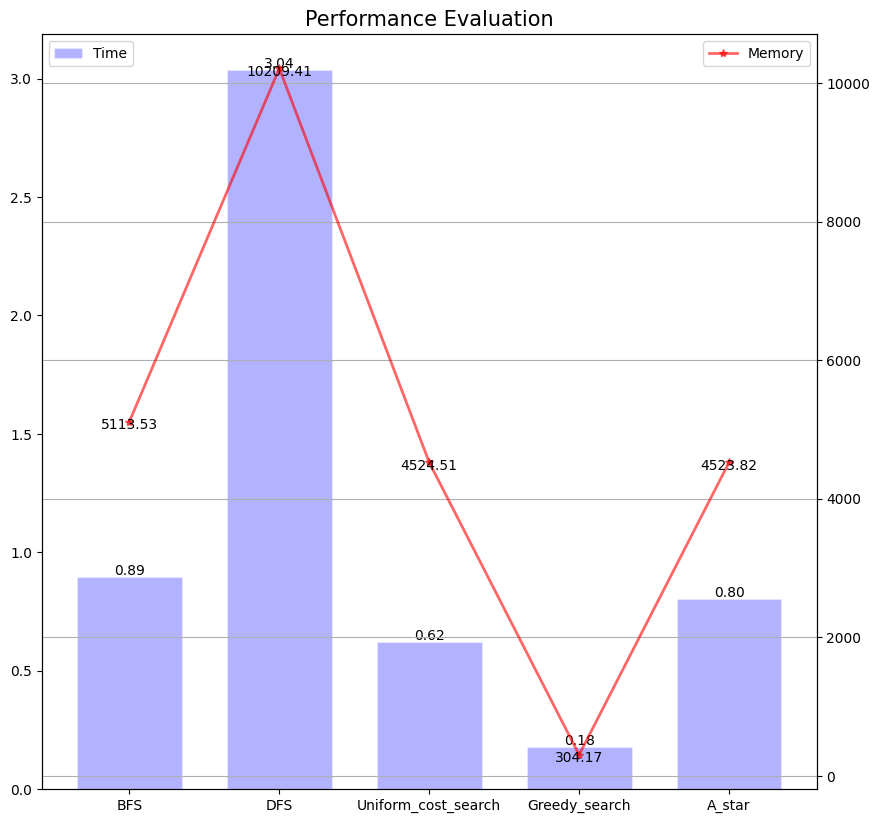

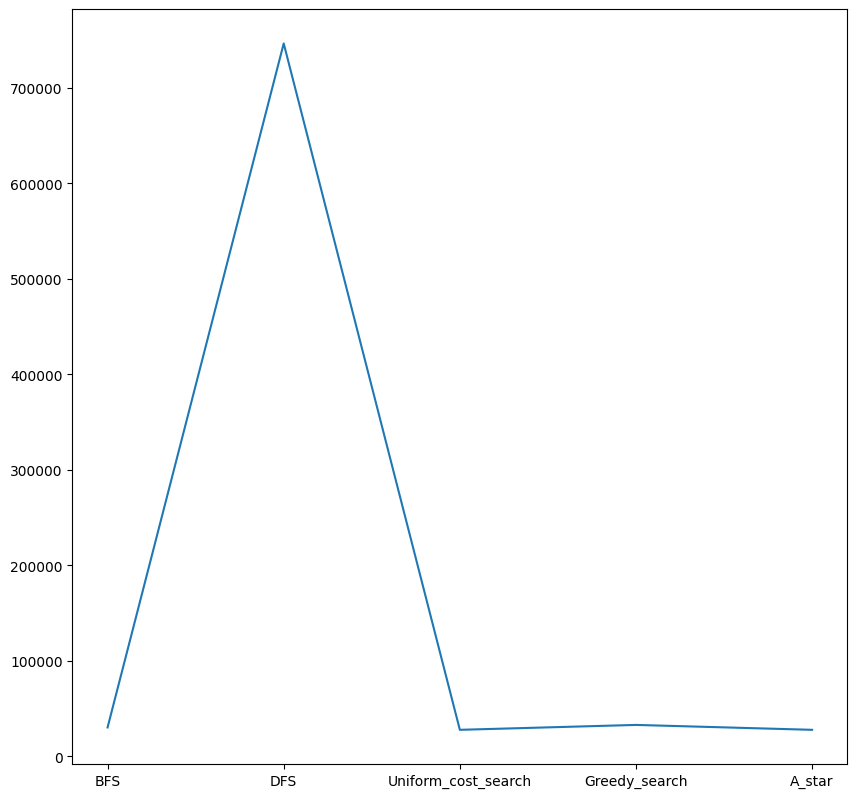

In [55]:
Comparison(memory_dict,time_dict,'0-2.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("0-2_cost_perfomance")

Total Run_time: 288.5784461000003
Occupancy_of_space:  11145.81

Total Run_time: 313.6975083999996
Occupancy_of_space:  11164.99

Total Run_time: 283.51346769999964
Occupancy_of_space:  11469.75

Total Run_time: 17.55129350000061
Occupancy_of_space:  493.32

Total Run_time: 314.8019903000004
Occupancy_of_space:  11468.9



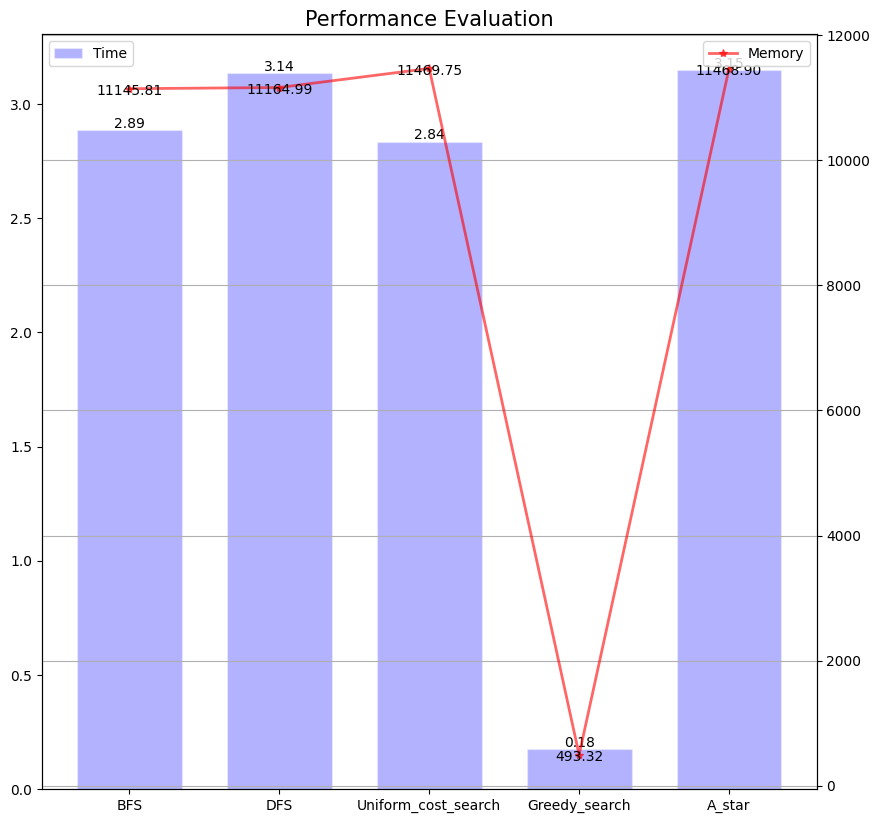

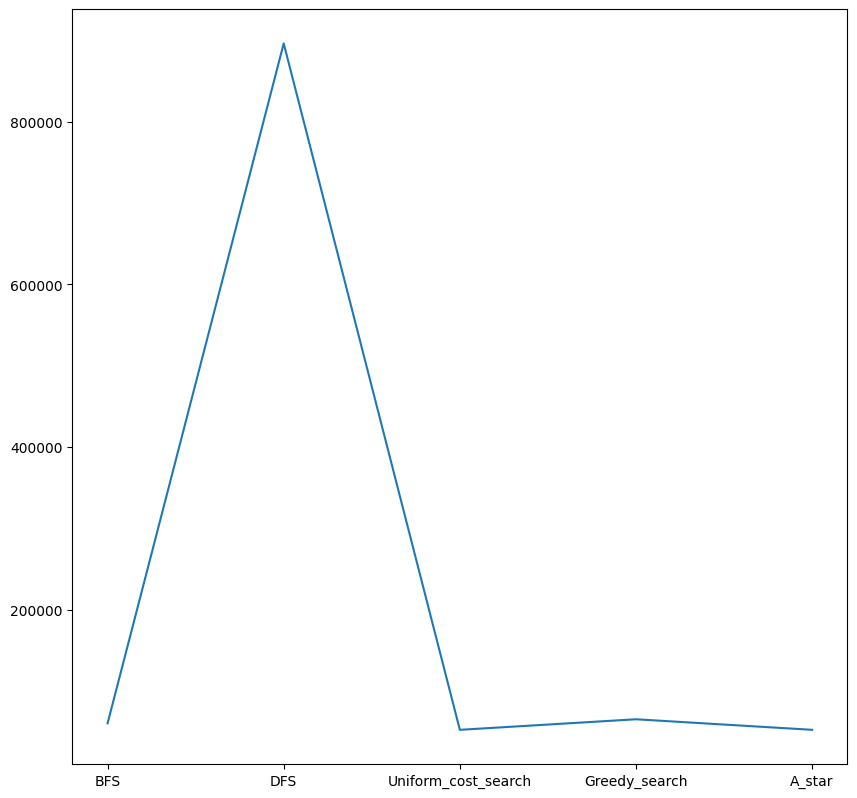

In [56]:
test_start_node = startpoint_2
test_end_node = endpoint_2
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)
Comparison(memory_dict,time_dict,'2-4.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("2-4_cost_perfomance")

Total Run_time: 449.60754520000046
Occupancy_of_space:  14154.91

Total Run_time: 330.51884809999865
Occupancy_of_space:  11294.87

Total Run_time: 432.74935989999904
Occupancy_of_space:  14757.88

Total Run_time: 17.01307850000012
Occupancy_of_space:  644.44

Total Run_time: 469.8041658000002
Occupancy_of_space:  14757.58



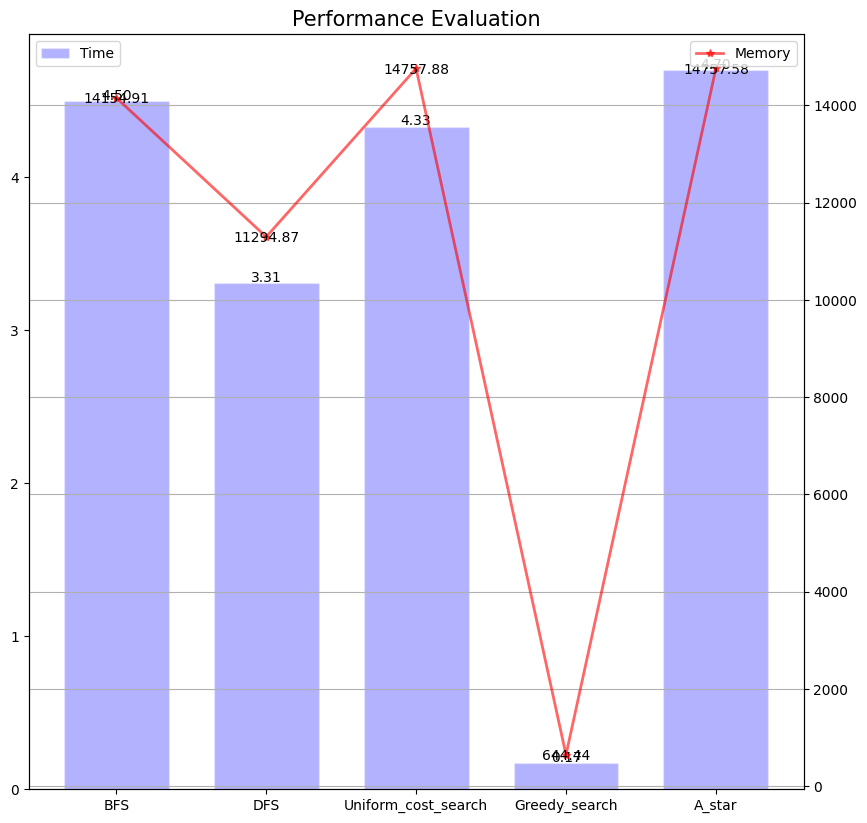

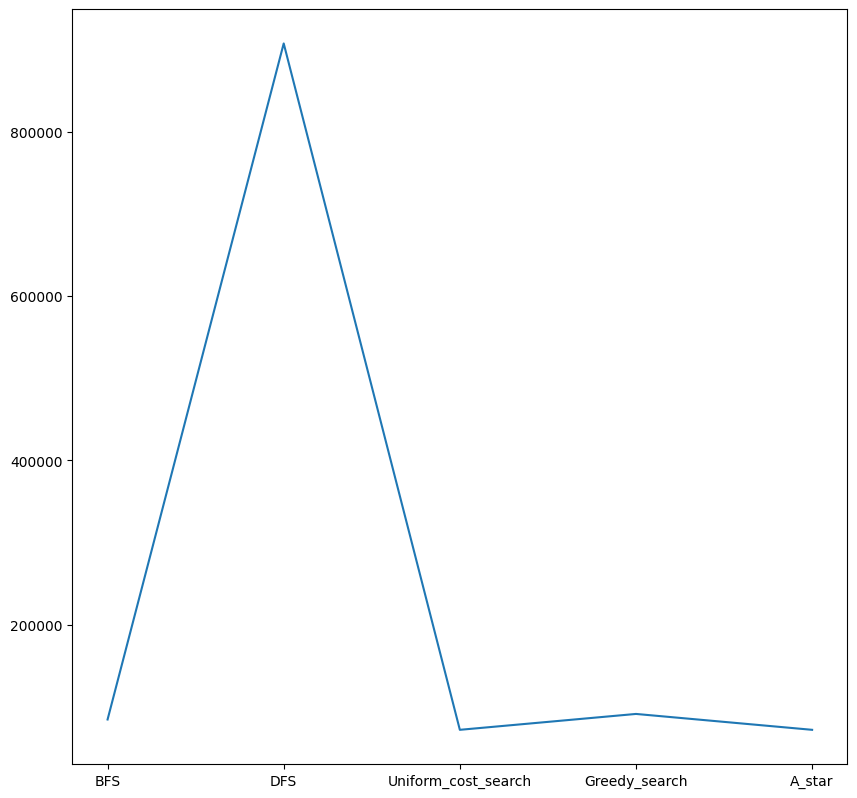

In [57]:
test_start_node = startpoint_3
test_end_node = endpoint_3
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)
Comparison(memory_dict,time_dict,'4-6.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("4-6_cost_perfomance")

Total Run_time: 567.033974599999
Occupancy_of_space:  16966.2

Total Run_time: 371.8323513000014
Occupancy_of_space:  12471.16

Total Run_time: 629.6445134000005
Occupancy_of_space:  17575.32

Total Run_time: 19.776452699999936
Occupancy_of_space:  959.66

Total Run_time: 658.4952302000002
Occupancy_of_space:  17575.15



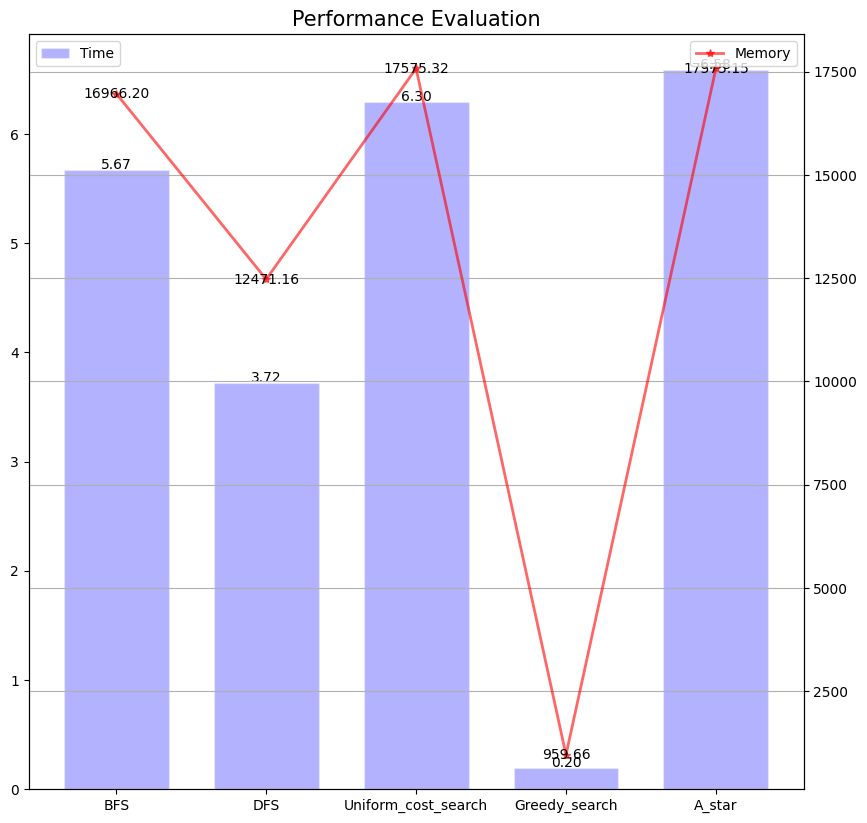

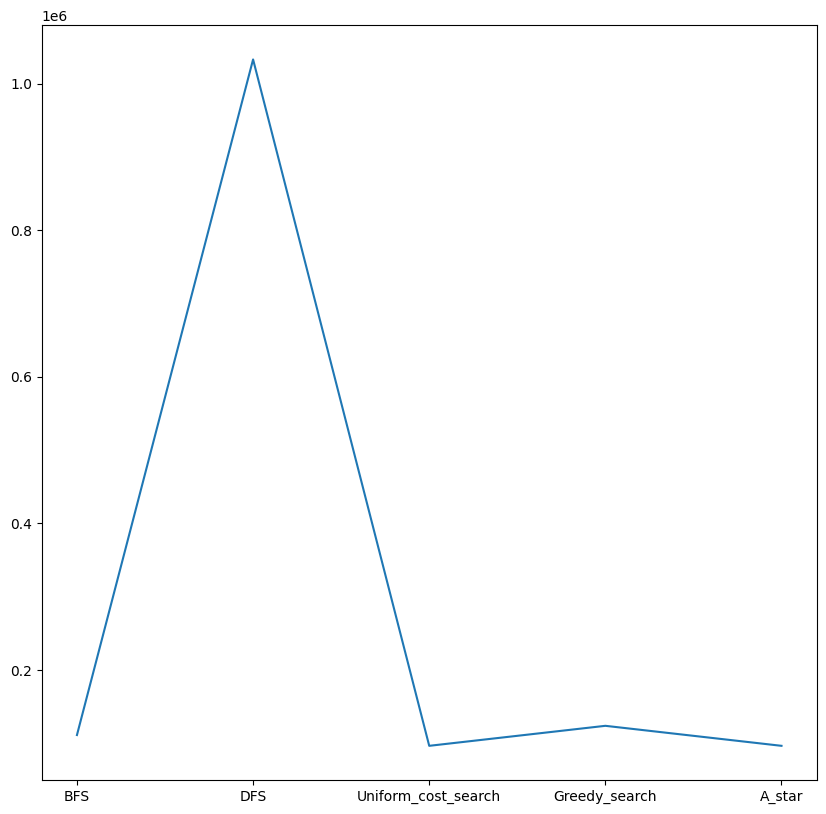

In [58]:
test_start_node = startpoint_4
test_end_node = endpoint_4
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)
Comparison(memory_dict,time_dict,'6-8.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("6-8_cost_perfomance")

In [35]:
test_start_node = startpoint_5
test_end_node = endpoint_5
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)
Comparison(memory_dict,time_dict,'8-10.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("8-10_cost_perfomance")

Total Run_time: 719.088209
Occupancy_of_space:  18587.04

Total Run_time: 415.4897077999999
Occupancy_of_space:  13486.73

Total Run_time: 750.5151794999997
Occupancy_of_space:  18971.89

Total Run_time: 41.64513140000008
Occupancy_of_space:  1171.29

Total Run_time: 793.5422791000001
Occupancy_of_space:  18971.69



NameError: name 'Comparison' is not defined

In [ ]:
test_start_node = startpoint_6
test_end_node = endpoint_6
memory_dict=dict()
time_dict=dict()
cost_dict=dict()
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['DFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)
Comparison(memory_dict,time_dict,'10-end.jpg')
plt.figure(figsize=(10,10),dpi=100)
plt.plot(cost_dict.keys(),cost_dict.values())
plt.savefig("10-end_cost_perfomance")

KeyboardInterrupt: 